In [224]:
import keras.datasets.mnist as mnist
from keras.optimizers import Adam
from keras.layers import Input, InputLayer, BatchNormalization, Activation, UpSampling2D, Conv2DTranspose, Lambda
from keras.layers import Conv1D, MaxPool2D, MaxPooling2D
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout, Reshape, Flatten
from keras.layers import Conv2D
from keras.layers.advanced_activations import LeakyReLU
from keras import initializers

import matplotlib.pyplot as plt
import imageio
import os
import numpy as np
from shutil import copyfile
import matplotlib.pyplot as plt
from keras import backend as BK

In [2]:
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk('./emojies_face/'):
    for file in f:
            files.append(os.path.join(r, file))

dataset = np.zeros((len(files),72,72,4))
for i in range(0, len(files)):
    file = files[i]
    print(file)
    image = imageio.imread(file)
    dataset[i] = image
dataset

./emojies_face/dizzy-face_1f635.png
./emojies_face/white-frowning-face_2639.png
./emojies_face/tired-face_1f62b.png
./emojies_face/hugging-face_1f917.png
./emojies_face/panda-face_1f43c.png
./emojies_face/face-with-open-mouth_1f62e.png
./emojies_face/money-mouth-face_1f911.png
./emojies_face/dog-face_1f436.png
./emojies_face/hushed-face_1f62f.png
./emojies_face/lying-face_1f925.png
./emojies_face/smiling-face-with-open-mouth_1f603.png
./emojies_face/face-with-uneven-eyes-and-wavy-mouth_1f974.png
./emojies_face/slightly-smiling-face_1f642.png
./emojies_face/face-without-mouth_1f636.png
./emojies_face/pouting-face_1f621.png
./emojies_face/face-with-one-eyebrow-raised_1f928.png
./emojies_face/flushed-face_1f633.png
./emojies_face/clown-face_1f921.png
./emojies_face/monkey-face_1f435.png
./emojies_face/frog-face_1f438.png
./emojies_face/face-with-finger-covering-closed-lips_1f92b.png
./emojies_face/cat-face-with-wry-smile_1f63c.png
./emojies_face/face-throwing-a-kiss_1f618.png
./emojies_fa

array([[[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
 

In [5]:
def get_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

In [89]:
def get_generator(optimizer, random_dim):
    
    def mapping_to_target_range( x, target_min=0, target_max=255):
        x02 = BK.tanh(x) + 1 # x in range(0,2)
        scale = ( target_max-target_min )/2.
        result = BK.round(x02 * scale + target_min)
        return result
    
    dropout = 0.4
    depth = 64+64+64+64
    dim = 7
    
    model = Sequential()
    
    model.add(InputLayer(batch_input_shape=(None, random_dim), dtype=np.float32, name="input_layer"))
#     model.add(Dense(units=72*72*4))
#     model.add(Activation('relu'))
#     model.add(Dropout(dropout))
    
#     # In: 100
#     # Out: dim x dim x depth
#     model.add(Dense(dim*dim*depth))
#     model.add(BatchNormalization(momentum=0.9))
#     model.add(Activation('relu'))
#     model.add(Dropout(dropout))
#     # In: dim x dim x depth
#     # Out: 2*dim x 2*dim x depth/2
#     model.add(UpSampling2D())
#     model.add(Conv2DTranspose(int(depth/2), 5, padding='same'))
#     model.add(BatchNormalization(momentum=0.9))
#     model.add(Activation('relu'))
#     model.add(UpSampling2D())
#     model.add(Conv2DTranspose(int(depth/4), 5, padding='same'))
#     model.add(BatchNormalization(momentum=0.9))
#     model.add(Activation('relu'))
#     model.add(Conv2DTranspose(int(depth/8), 5, padding='same'))
#     model.add(BatchNormalization(momentum=0.9))
#     model.add(Activation('relu'))
#     # Out: 28 x 28 x 1 grayscale image [0.0,1.0] per pix
#     model.add(Conv2DTranspose(1, 5, padding='same'))
#     model.add(Activation('sigmoid'))   
    
    model.add(Dense(units=72*72*4))
#     model.add(Activation('tanh'))    
    model.add(Activation(activation=mapping_to_target_range))
    model.add(Reshape(target_shape=(72,72,4)))
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return model

In [90]:
optimizer = get_optimizer()

In [91]:
generator = get_generator(optimizer, 100)

ValueError: Shape must be rank 4 but is rank 2 for 'up_sampling2d_9/ResizeNearestNeighbor' (op: 'ResizeNearestNeighbor') with input shapes: [?,12544], [2].

noise is [[-0.19611065 -1.06296045 -1.92972299  1.7011393  -2.46849416  0.19205709
  -1.85705683 -0.23504661 -0.4005057   0.06778051  1.61312685  1.31088969
   2.69469825  0.81372732 -0.2092069  -0.27556504 -0.18639362 -1.90267749
   1.17567454  0.8817532  -0.59380591  0.06677083  0.21216086 -1.11600019
  -1.63932451  0.53240031 -0.50571019  0.38761711  0.66159702  1.1515375
   0.57121496  0.53754252  1.49015312 -0.30255724 -0.17194441  0.10033669
   1.37757714 -0.78484786 -0.65190975 -1.74655514 -1.81259246  0.23709974
   0.12291428  0.58858725 -0.89793784 -0.1279431  -0.42830014 -1.02724357
   0.19426402 -0.69148228 -0.76712269 -0.98381814  0.15185316  0.54224081
   0.20402617  1.92571907 -0.5250828   0.9964391   0.141327   -0.65392245
   0.01707088  0.08006511  0.9637139  -0.25752731  0.01000848  0.1769685
  -0.22440672 -0.80370312 -0.08508988  0.22488459 -0.44540597 -1.47647521
   0.80037928  0.44062971 -0.18336877 -1.4860784   0.22118046  1.54875325
   1.42998235 -1.42979391  1.14

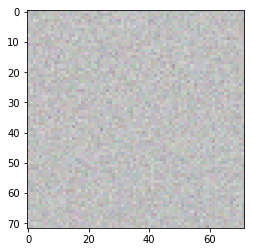

(1, 72, 72, 4)
[[[[119 133 122 141]
   [123 118 139 122]
   [131 126 148 151]
   ...
   [135 122 128 112]
   [142  98 144 127]
   [119 125 142 130]]

  [[137 125 121 119]
   [112 114 129 134]
   [113 146 127 160]
   ...
   [117 123 123 131]
   [122 124 130 138]
   [110 126 126 126]]

  [[152 139 134 131]
   [104 119 140 132]
   [114 139 137 120]
   ...
   [136 129 110 141]
   [140 134 111 125]
   [105 121 129 134]]

  ...

  [[153 121 140 101]
   [108 115 111 134]
   [107 143 121 135]
   ...
   [137 110 126 121]
   [135 126 121 127]
   [117 134 109 124]]

  [[127 116 127 111]
   [127 135 150 115]
   [150 152 119 101]
   ...
   [115 135 135 102]
   [140 106 130 137]
   [145 147 112 153]]

  [[126 144 132 135]
   [115 107 121 131]
   [136 124 142 128]
   ...
   [147 122 112 137]
   [120 118 106 112]
   [124 140 136 118]]]]


In [85]:
_random_dim = 100
noise = np.random.normal(0, 1, size=[1, _random_dim])
print("noise is", noise)
generated_images = generator.predict(noise, _random_dim)
generated_images = generated_images.astype('int')
plt.imshow(generated_images[0])
plt.show()
print(generated_images.shape)
print(generated_images)

In [35]:
def get_discriminator(optimizer):
    
    input_shape = (72,72,4)
    dropout = 0.4
    
    discriminator = Sequential()
    discriminator.add(Conv2D(5, 3, strides=2, input_shape=input_shape, padding='same'))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(dropout))
    
    discriminator.add(Conv2D(4, 3, strides=2, padding='same'))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(dropout))
    
    discriminator.add(Conv2D(3, 3, strides=2, padding='same'))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(dropout))
    
    discriminator.add(Conv2D(2, 3, strides=2, padding='same'))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(dropout))
    
    discriminator.add(Conv2D(1, 3, strides=2, padding='same'))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(dropout))
    
    discriminator.add(Flatten())
    discriminator.add(Dense(1))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return discriminator

In [36]:
discriminator = get_discriminator(optimizer)
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 36, 36, 5)         185       
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 36, 36, 5)         0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 36, 36, 5)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 18, 18, 4)         184       
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 18, 18, 4)         0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 18, 18, 4)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 9, 9, 3)           111       
__________

In [38]:
discrimination = discriminator.predict(generated_images)
print(discrimination.shape)
print(discrimination)

(7, 1)
[[-0.00237226]
 [-0.00084297]
 [-0.00509105]
 [-0.002304  ]
 [-0.00136048]
 [-0.00011764]
 [-0.0031365 ]]


In [6]:
temp_model = Sequential()
temp_model.add(Dense(72*72*4*4, input_dim=(100)))
temp_model.add(Dropout(0.4))
temp_model.add(Reshape(target_shape=(72*2,72*2,4)))
temp_model.add(UpSampling2D())
# temp_model.add(Activation('tanh'))
temp_model.add(Activation('sigmoid'))
temp_model.add(Reshape(target_shape=(72,72,4)))
temp_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
temp_model.summary()

ValueError: total size of new array must be unchanged

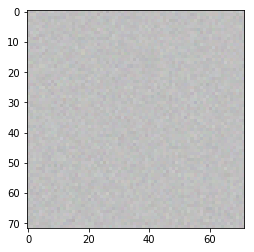

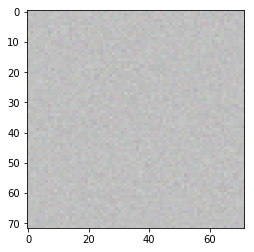

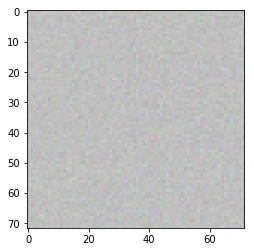

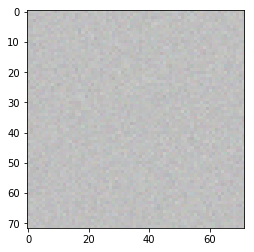

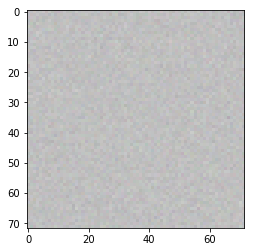

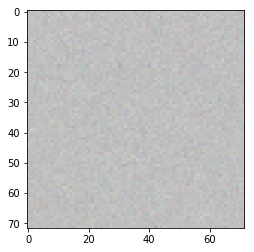

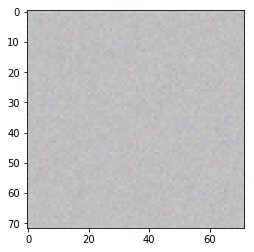

In [4]:
noise = np.random.normal(0,1,size=(7, 100))
prediction = temp_model.predict(noise)
for i in range(0,7):
    plt.imshow(prediction[i])
    plt.show()

In [231]:
input_layer = Input(shape=(6,6))
layer_1 = Reshape(target_shape=(6,6,1))(input_layer)
# layer_2 = Conv2D(
#     filters=2, kernel_size=(2,2), strides=2,
#     activation='linear', 
#     kernel_initializer='ones', 
#     bias_initializer='zeros'
# )(layer_1)
# layer_2 = MaxPool2D(pool_size=(2,2))(layer_1)
layer_2 = MaxPooling2D(pool_size=(2,2), strides=(1,1))(layer_1)
model_1 = Model(input_layer, layer_1)
model_2 = Model(input_layer, layer_2)

In [232]:
x = np.array(
    [
        [
            [1,2,3,4,5,6],
            [7,8,9,10,11,12],
            [13,14,15,16,17,18],
            [19,20,21,22,23,24],
            [25,26,27,28,29,30],
            [31,32,33,34,35,36]
        ],
        [
            [1,0,0,0,0,0],
            [0,1,0,0,0,0],
            [0,0,1,0,0,0],
            [0,0,0,1,0,0],
            [0,0,0,0,1,0],
            [0,0,0,0,0,1]
        ]        
    ]
)

In [233]:
p = model_1.predict(x)
print(p[1].shape)
print(p[1])

(6, 6, 1)
[[[1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]]]


In [234]:
p = model_2.predict(x)
print(p[1].shape)
print(p[1])

(5, 5, 1)
[[[1.]
  [1.]
  [0.]
  [0.]
  [0.]]

 [[1.]
  [1.]
  [1.]
  [0.]
  [0.]]

 [[0.]
  [1.]
  [1.]
  [1.]
  [0.]]

 [[0.]
  [0.]
  [1.]
  [1.]
  [1.]]

 [[0.]
  [0.]
  [0.]
  [1.]
  [1.]]]
